# Binary Image Classification Project

### Although deep learning provides better performance in classifying images we are going to use a classical technique, SVM to be specific, to classify an image to predict whether fire is present or not

### Importing the required libraries

In [38]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [39]:
!pip install split-folders
import splitfolders

/bin/bash: pip: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Using `splitfolder` module to divide the dataset into train and test data

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/Colab Notebooks/data/Fire-Detection', output="output", seed=1337, ratio=(.8, .2))    

Copying files: 651 files [03:10,  3.41 files/s]


### Defining the training path

In [40]:
train_path = "/content/drive/MyDrive/Colab Notebooks/data/output/train"
class_names = os.listdir(train_path)
print("Training_Classes",class_names)

test_path = "/content/drive/MyDrive/Colab Notebooks/data/output/val/"
class_names_test = os.listdir(test_path)
print("Testing_Classes",class_names_test)

Training_Classes ['0', '1']
Testing_Classes ['0', '1']


### Create Image_paths and classes list

In [41]:
image_paths_0 = []
image_paths_1 = []
image_classes = []

image_test_paths_0 = []
image_test_paths_1 = []
image_test_classes = []

### Function to List all the filenames in the directory

In [42]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [43]:
for training_name in class_names:
    dir_ = os.path.join(train_path,training_name)
    class_path = img_list(dir_)
    print(class_path)
    if training_name == '0':
        image_paths_0 += class_path
        print(image_paths_0)
    if training_name == '1':
      image_paths_1 += class_path
      print(image_paths_1)

<generator object img_list.<locals>.<genexpr> at 0x7f40500b2580>
['output/train/0/276.jpg', 'output/train/0/84.jpg', 'output/train/0/526.jpg', 'output/train/0/227.jpg', 'output/train/0/358.jpg', 'output/train/0/366.jpg', 'output/train/0/200.jpg', 'output/train/0/190.jpg', 'output/train/0/314.jpg', 'output/train/0/179.jpg', 'output/train/0/35.jpg', 'output/train/0/371.jpg', 'output/train/0/459.jpg', 'output/train/0/510.jpg', 'output/train/0/26.jpg', 'output/train/0/329.jpg', 'output/train/0/21.jpg', 'output/train/0/246.jpg', 'output/train/0/494.jpg', 'output/train/0/351.jpg', 'output/train/0/498.JPG', 'output/train/0/38.jpg', 'output/train/0/294.jpg', 'output/train/0/196.jpg', 'output/train/0/384.jpg', 'output/train/0/47.jpg', 'output/train/0/93.jpg', 'output/train/0/373.jpg', 'output/train/0/278.jpg', 'output/train/0/258.jpg', 'output/train/0/304.jpg', 'output/train/0/206.jpg', 'output/train/0/279.jpg', 'output/train/0/221.jpg', 'output/train/0/537.jpg', 'output/train/0/273.jpg', 'outp

In [44]:
len(image_paths_0)

432

In [45]:
len(image_paths_1)

88

In [46]:
image_classes_0 = [0]*(len(image_paths_0))
print(image_classes_0)
print(len(image_classes_0))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [47]:
image_classes_1 = [1]*(len(image_paths_1))
print(image_classes_1)
print(len(image_classes_1))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
88


In [48]:
image_classes = image_classes_0 + image_classes_1
print(image_classes)
print(len(image_classes))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [49]:
for testing_name in class_names_test:
    if testing_name == '0':
        dir_ = os.path.join(test_path,testing_name)
        class_test_paths = img_list(dir_)
        image_test_paths_0 += class_test_paths
    if testing_name == '1':
        dir_ = os.path.join(test_path,testing_name)
        class_test_path = img_list(dir_)
        image_test_paths_1 += class_test_path

### Append all the image path and its corresponding labels in a list

In [50]:
D_0 = []
D_1 = []

D_test_0 = []
D_test_1 = []

In [51]:
for i in range(len(image_classes_0)):
    D_0.append((image_paths_0[i],image_classes_0[i]))

for i in range(len(image_classes_1)):
    D_1.append((image_paths_1[i],image_classes_1[i]))

In [52]:
D = []

D = D_0 + D_1

print(len(D))

520


### Testing Image Path and its corresponding labels in a list 


In [53]:
image_test_classes_0 = [0]*(len(image_test_paths_0))
image_test_classes_1 = [1]*(len(image_test_paths_1))
image_test_classes = image_classes_0 + image_classes_1

for i in range(len(image_test_classes_0)):
    D_test_0.append((image_test_paths_0[i],image_test_classes_0[i]))

for i in range(len(image_test_classes_1)):
    D_test_1.append((image_test_paths_1[i],image_test_classes_1[i]))


D_test = D_test_0 + D_test_1

print(len(D_test))

131


### Shuffle Dataset and split into Training and Testing

In [54]:
dataset_train = D
dataset_test = D_test
random.shuffle(dataset_train)
random.shuffle(dataset_test)
train = dataset_train
test = dataset_test

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

print(image_paths)
print(y_train)

print(image_paths_test)
print(y_test)

('output/train/0/483.jpg', 'output/train/0/382.jpg', 'output/train/0/9.jpg', 'output/train/0/265.jpg', 'output/train/0/35.jpg', 'output/train/0/269.jpg', 'output/train/0/258.jpg', 'output/train/0/330.jpg', 'output/train/0/201.jpg', 'output/train/0/219.jpg', 'output/train/0/409.jpg', 'output/train/0/532.jpg', 'output/train/0/524.jpg', 'output/train/0/379.jpg', 'output/train/0/363.jpg', 'output/train/0/154.jpg', 'output/train/0/406.jpg', 'output/train/0/68.jpg', 'output/train/0/246.jpg', 'output/train/0/408.jpg', 'output/train/0/3.jpg', 'output/train/0/264.jpg', 'output/train/0/304.jpg', 'output/train/0/373.jpg', 'output/train/0/15.jpg', 'output/train/0/53.jpg', 'output/train/0/484.jpg', 'output/train/1/47.jpg', 'output/train/0/149.jpg', 'output/train/0/164.jpg', 'output/train/0/528.jpg', 'output/train/0/359.jpg', 'output/train/0/348.jpg', 'output/train/0/242.jpg', 'output/train/0/249.jpg', 'output/train/0/513.jpg', 'output/train/0/317.jpg', 'output/train/1/92.jpg', 'output/train/1/69.jp

### Feature Extraction using ORB

In [55]:
des_list = []

In [56]:
orb = cv2.ORB_create()

In [57]:
im = cv2.imread(image_paths[1])

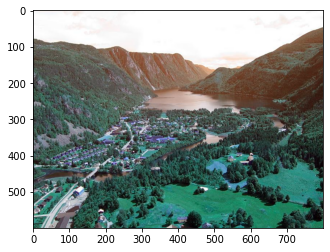

In [58]:
plt.imshow(im)

### Plotting the keypoints

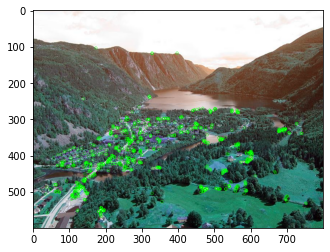

In [61]:
def draw_keypoints(vis, keypoints, color = (0, 255, 0)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 4, color))

kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img = draw_keypoints(im,kp)

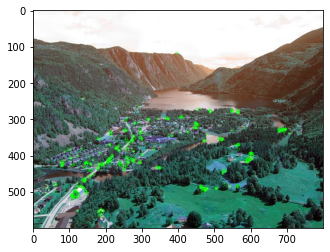

### Appending descriptors of the training images in list

In [ ]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [ ]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors.shape

(255950, 32)

In [ ]:
descriptors_float=descriptors.astype(float)

### Performing K Means clustering on Descriptors

In [ ]:
from scipy.cluster.vq import kmeans,vq

In [ ]:
k=100
voc,variance=kmeans(descriptors_float,k,1)

In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

### Applying standardisation on training feature


In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

### Creating Classification Model with SVM

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=80000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
des_list_test=[]

In [ ]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [ ]:
len(image_paths_test)

131

In [ ]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [ ]:
test_features

array([[11.,  4.,  7., ...,  5.,  6.,  1.],
       [ 7.,  3.,  9., ...,  3., 30.,  3.],
       [ 3.,  7.,  2., ...,  5.,  2.,  5.],
       ...,
       [ 5.,  8.,  3., ...,  2.,  3.,  4.],
       [ 3.,  1.,  0., ...,  0.,  4., 22.],
       [ 4.,  5.,  6., ...,  9.,  2.,  6.]], dtype=float32)

In [ ]:
test_features=stdslr.transform(test_features)

### Evaluation of Trained model

In [ ]:
true_classes=[]
for i in y_test:
    if i==1:
        true_classes.append("FIRE")
    else:
        true_classes.append("NO FIRE")

In [ ]:
predict_classes=[]
for i in clf.predict(test_features):
    if i==1:
        predict_classes.append("FIRE")
    else:
        predict_classes.append("NO FIRE")

In [ ]:
clf.predict(test_features)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy)

0.8396946564885496


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes,predict_classes)

array([[  9,  13],
       [  8, 101]])

### Classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes,predict_classes))

              precision    recall  f1-score   support

        FIRE       0.53      0.41      0.46        22
     NO FIRE       0.89      0.93      0.91       109

    accuracy                           0.84       131
   macro avg       0.71      0.67      0.68       131
weighted avg       0.83      0.84      0.83       131

